In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = './input/'
file1_name = path + 'test22_ana_SPLHFC_S07.txt'
plottitle = file1_name + '; Analytical SPL; Sources: 4135 at 2100psi'
freq_limit = True
low_freq = False
file2_name = path + 'test22_ana_SPLHFC_S07.txt'
#value1 = 'SEL'
value1 = 'SPL'
RAM = False

In [3]:
f = open(file2_name)
lines = f.read().splitlines()
f.close()
for i, line in enumerate(lines):
    if i < 200:
        print(i, line)

0 FileType : Sound Pressure Level
1 FileVersion : 5
2 SourceKernel : 2.0
3 Routine : Analytical
4 Geometrical_spread : 2
5 RMS_window_length(ms) : 0.5
6 Azimuth_beg : 0
7 Azimuth_end : 0
8 Azimuth_inc : 40
9 Range_beg : 100
10 Range_end : 50000
11 Range_inc : 100
12 Depth_beg : 20
13 Depth_end : 1000
14 Depth_inc : 20
15 Filter_bool : 1
16 Coordinate_system : Cylindrical
17 Filter_name : Wavelet=(Project=(name=Default),name=High Freq Cetaceans (Southall 2007),type=Environmental Filter)
18 Filter_frLow : 200
19 Filter_frHigh : 999
20 Filter_slLow : 1
21 Filter_slHigh : 1
22 Sea_WaterAttn : None
23 Notional_name : 4135H__080_2100_080
24 
25 Azimuth:deg  Range:m  Depth:m  SPL:dB re 1uPa  
26 0            100      20       193.634         
27 0            100      40       197.076         
28 0            100      60       193.261         
29 0            100      80       192.038         
30 0            100      100      195.64          
31 0            100      120      192.733         

In [4]:
df = pd.DataFrame()

In [5]:
column_names = ['Azimuth', 'Range', 'Depth', value1]

In [6]:
if freq_limit:
    rowstoskip = 26
    #minval = 120
    minval = 100
    maxval = 220
    if low_freq:
        minval = 100
        #minval = 130
        maxval = 220
else:
    if RAM:
        rowstoskip = 20
    else:
        rowstoskip = 21
    minval = 80
    #minval = 130
    maxval = 220

In [7]:
df = pd.read_csv(file1_name, names=column_names, skiprows=rowstoskip, delim_whitespace=True)

In [8]:
df.drop(['Azimuth'], axis=1, inplace=True)

In [9]:
len(df)

25000

In [10]:
df_reverse = pd.read_csv(file2_name, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
df_reverse.drop(['Azimuth'], axis=1, inplace=True)

In [11]:
len(df_reverse)

25000

In [12]:
df = df[df['Range'] <= 40000]
df_reverse = df_reverse[df_reverse['Range'] <= 40000]

In [13]:
df_pivot = df.pivot(index='Depth', columns='Range', values=value1)

In [14]:
#df_pivot

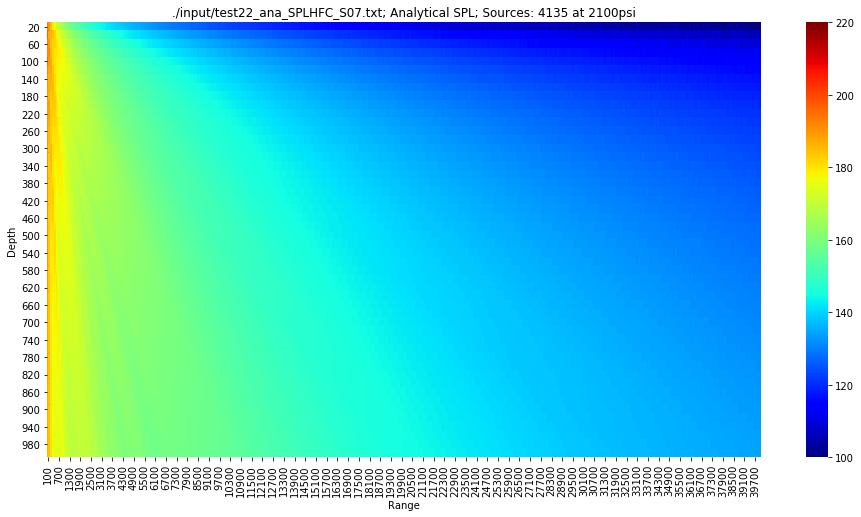

In [15]:
plt.figure(figsize=(16,8))
plt.title(plottitle)
sns.heatmap(df_pivot, cmap='jet', vmin=minval, vmax=maxval)
plt.savefig('1.png'); 

In [16]:
#df

In [17]:
#def mirror_data(data):
#    data_temp = data[['Range']]
#    data_temp_sort = data_temp.sort_values(by=['Range'], ascending=False).reset_index(drop=True)
#    data = data.join(data_temp_sort, rsuffix='-mirror') 
#    return data
    

In [18]:
#data_mirror = mirror_data(df)

In [19]:
#data_mirror

In [20]:
def data_mirror_zero(data):
    data_negative = data.copy(deep=True)
    data_zero_offset = data.loc[data['Range'] == 100].reset_index(drop=True)
    data_zero_offset['Range'] = 0
    print(data_zero_offset)
    data_negative['Range'] = data_negative['Range'].apply(np.negative)
    data_negative_sort = data_negative.sort_values(by=['Range','Depth'])#.reset_index(drop=True)
    combined_data = pd.concat([data_negative_sort, data_zero_offset, data]).reset_index(drop=True)
    return combined_data

In [21]:
df_mirror = data_mirror_zero(df)

    Range  Depth      SPL
0       0     20  193.634
1       0     40  197.076
2       0     60  193.261
3       0     80  192.038
4       0    100  195.640
5       0    120  192.733
6       0    140  190.922
7       0    160  190.250
8       0    180  189.541
9       0    200  189.437
10      0    220  189.180
11      0    240  189.681
12      0    260  189.964
13      0    280  190.004
14      0    300  189.817
15      0    320  190.266
16      0    340  190.559
17      0    360  190.717
18      0    380  190.525
19      0    400  190.428
20      0    420  190.547
21      0    440  190.486
22      0    460  190.414
23      0    480  190.387
24      0    500  190.337
25      0    520  190.240
26      0    540  190.033
27      0    560  189.912
28      0    580  189.812
29      0    600  189.601
30      0    620  189.369
31      0    640  189.140
32      0    660  188.915
33      0    680  188.686
34      0    700  188.435
35      0    720  188.309
36      0    740  188.233
37      0   

In [22]:
df_reverse_mirror = data_mirror_zero(df_reverse)

    Range  Depth      SPL
0       0     20  193.634
1       0     40  197.076
2       0     60  193.261
3       0     80  192.038
4       0    100  195.640
5       0    120  192.733
6       0    140  190.922
7       0    160  190.250
8       0    180  189.541
9       0    200  189.437
10      0    220  189.180
11      0    240  189.681
12      0    260  189.964
13      0    280  190.004
14      0    300  189.817
15      0    320  190.266
16      0    340  190.559
17      0    360  190.717
18      0    380  190.525
19      0    400  190.428
20      0    420  190.547
21      0    440  190.486
22      0    460  190.414
23      0    480  190.387
24      0    500  190.337
25      0    520  190.240
26      0    540  190.033
27      0    560  189.912
28      0    580  189.812
29      0    600  189.601
30      0    620  189.369
31      0    640  189.140
32      0    660  188.915
33      0    680  188.686
34      0    700  188.435
35      0    720  188.309
36      0    740  188.233
37      0   

In [23]:
df_mirror_pivot = df_mirror.pivot(index='Depth', columns='Range', values=value1)

In [24]:
df_mirror_pivot.columns

Int64Index([-40000, -39900, -39800, -39700, -39600, -39500, -39400, -39300,
            -39200, -39100,
            ...
             39100,  39200,  39300,  39400,  39500,  39600,  39700,  39800,
             39900,  40000],
           dtype='int64', name='Range', length=801)

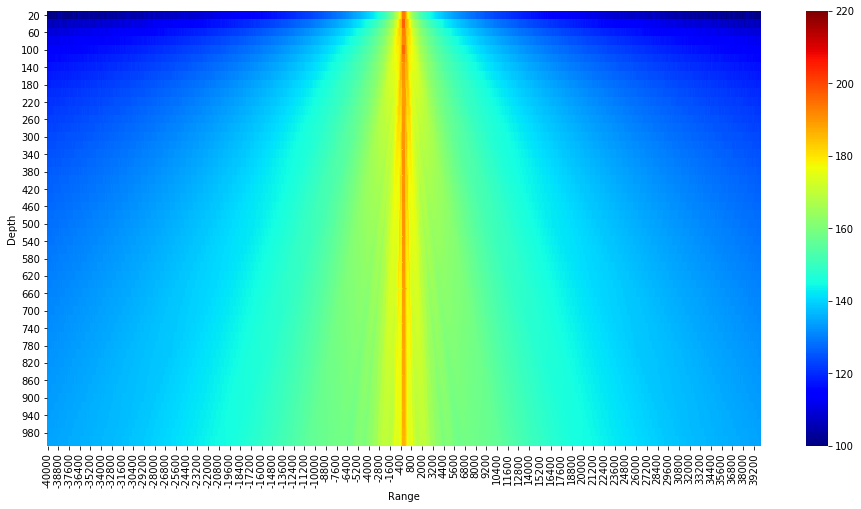

In [25]:
plt.figure(figsize=(16,8))
sns.heatmap(df_mirror_pivot, cmap='jet', vmin=minval, vmax=maxval); 

In [26]:
def shift_and_limit(data, shift, minval, maxval):
    data['Range'] = data['Range'] + shift
    data_limit = data.loc[(data['Range'] >= minval) & (data['Range'] <= maxval)].reset_index(drop=True)
    return data_limit

In [27]:
df_mirror_shift = shift_and_limit(df_mirror, 10000, 100, 40000)

In [28]:
df_mirror_shift_pivot = df_mirror_shift.pivot(index='Depth', columns='Range', values=value1)

In [29]:
#df_mirror_shift_pivot

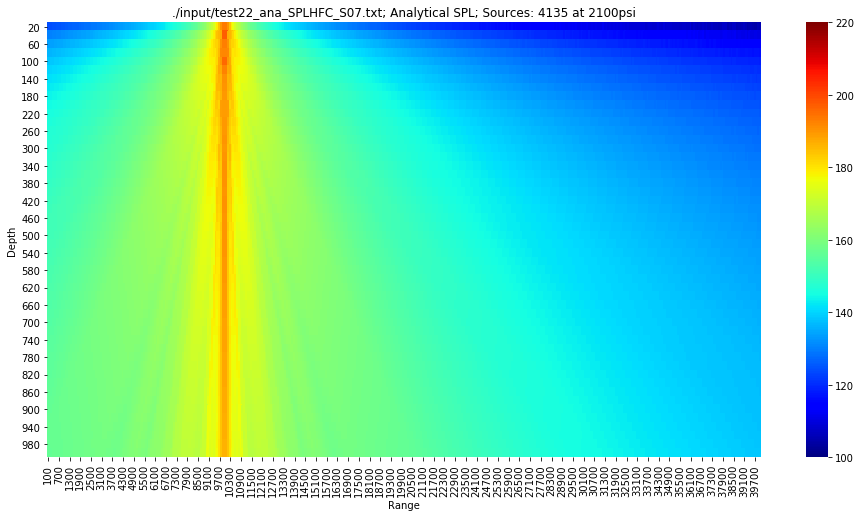

In [30]:
plt.figure(figsize=(16,8))
plt.title(plottitle)
sns.heatmap(df_mirror_shift_pivot, cmap='jet', vmin=minval, vmax=maxval)
plt.savefig('2.png'); 

In [31]:
len(df_mirror_shift)

20000

In [32]:
#df_merge = df.merge(df_mirror_shift, left_on='Range', right_on='Range')
df_merged = df.join(df_mirror_shift, rsuffix='-shift')    

In [33]:
#df_merged

In [34]:
def dB_sum(amp1, amp2):
    x = amp1/10
    y = amp2/10
    amp_comb = 10*np.log10(10**x + 10**y)
    return amp_comb 

In [35]:
print(dB_sum(182.568, 145.683))

182.56888969228777


In [36]:
df_merged[value1 + '_sum'] = df_merged.apply(lambda x: dB_sum(x[value1], x[value1 + '-shift']), axis=1)

In [37]:
#df_merged

In [38]:
df_merged_pivot = df_merged.pivot(index='Depth', columns='Range', values=value1+'_sum')

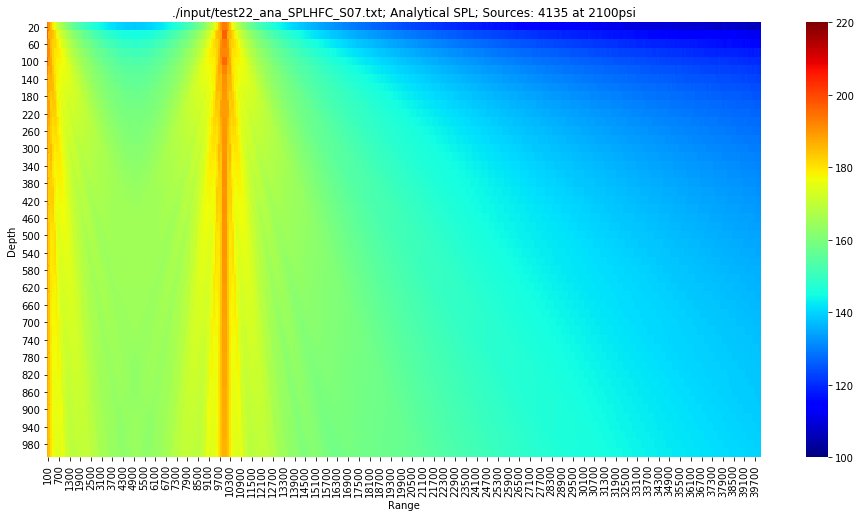

In [39]:
plt.figure(figsize=(16,8))
plt.title(plottitle)
sns.heatmap(df_merged_pivot, cmap='jet', vmin=minval, vmax=maxval)
plt.savefig('3.png'); 

In [40]:
#df_SI = shift_and_limit(df_mirror, 40000, 100, 50000)

In [41]:
df_SI = shift_and_limit(df_reverse_mirror, 40000, 100, 40000)

In [42]:
df_SI_pivot = df_SI.pivot(index='Depth', columns='Range', values=value1)

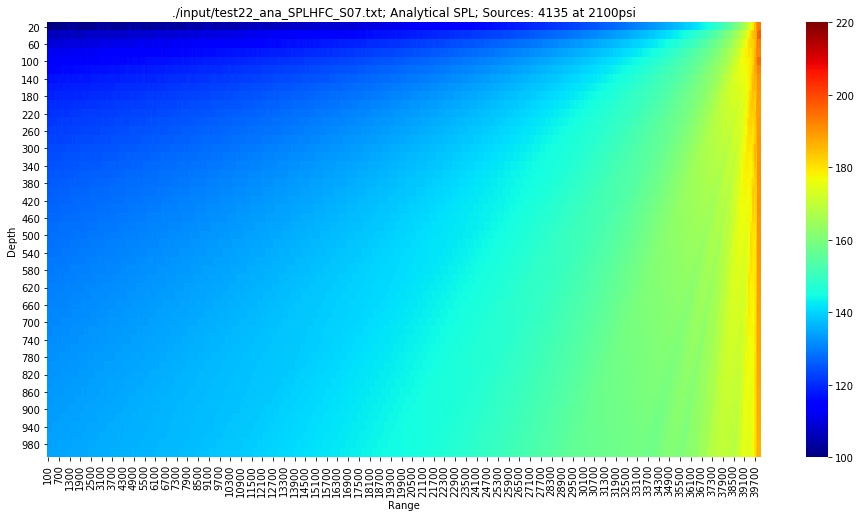

In [43]:
plt.figure(figsize=(16,8))
plt.title(plottitle)
sns.heatmap(df_SI_pivot, cmap='jet', vmin=minval, vmax=maxval)
plt.savefig('4.png'); 

In [44]:
df_SI_merged = df.join(df_SI, rsuffix='-shift') 

In [45]:
df_SI_merged[value1+'_sum'] = df_SI_merged.apply(lambda x: dB_sum(x[value1], x[value1+'-shift']), axis=1)

In [46]:
df_SI_merged_pivot = df_SI_merged.pivot(index='Depth', columns='Range', values=value1+'_sum')

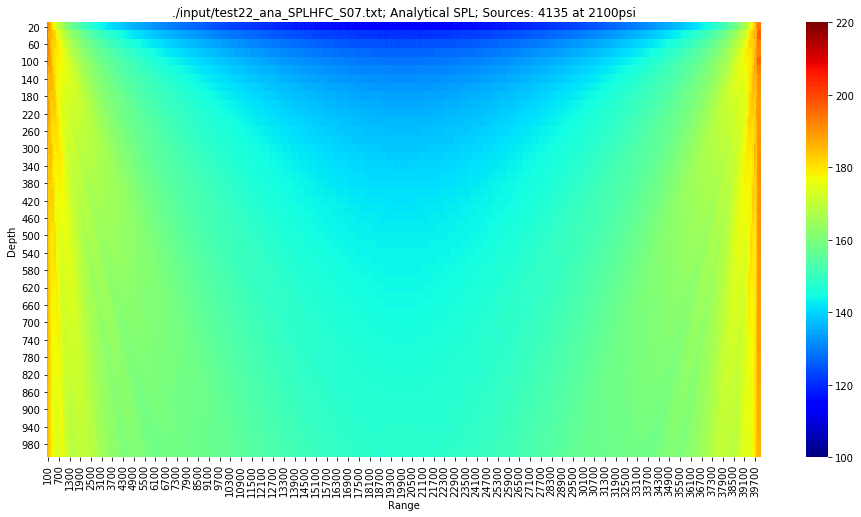

In [47]:
plt.figure(figsize=(16,8))
plt.title(plottitle)
sns.heatmap(df_SI_merged_pivot, cmap='jet', vmin=minval, vmax=maxval)
plt.savefig('5.png'); 

In [48]:
#df_merged

In [49]:
df_CLO_SI_merged = df_merged.join(df_SI, rsuffix='-shift2')

In [50]:
df_CLO_SI_merged[value1+'_SI_CLO_sum'] = df_CLO_SI_merged.apply(lambda x: dB_sum(x[value1+'_sum'], x[value1+'-shift2']), axis=1)

In [51]:
df_CLO_SI_merged_pivot = df_CLO_SI_merged.pivot(index='Depth', columns='Range', values=value1+'_SI_CLO_sum')

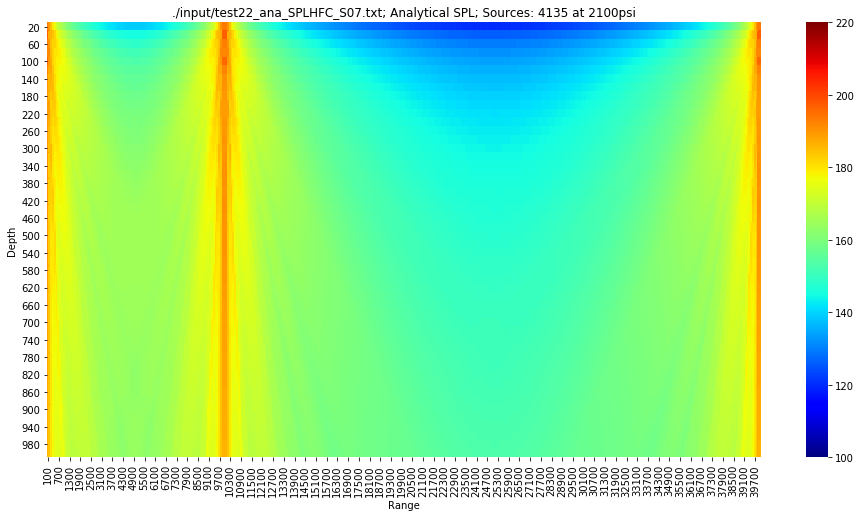

In [52]:
plt.figure(figsize=(16,8))
plt.title(plottitle)
sns.heatmap(df_CLO_SI_merged_pivot, cmap='jet', vmin=minval, vmax=maxval)
plt.savefig('6.png'); 

In [53]:
df_CLO_SI_merged_shallow = df_CLO_SI_merged.loc[df_CLO_SI_merged['Depth'] == 20].reset_index(drop=True)
df_SI_merged_shallow = df_SI_merged.loc[df_SI_merged['Depth'] == 20].reset_index(drop=True)
df_merged_shallow = df_merged.loc[df_merged['Depth'] == 20].reset_index(drop=True)
df_shallow = df.loc[df['Depth'] == 20].reset_index(drop=True)

In [54]:
sns.set_style("darkgrid")
sns.set_context("notebook")

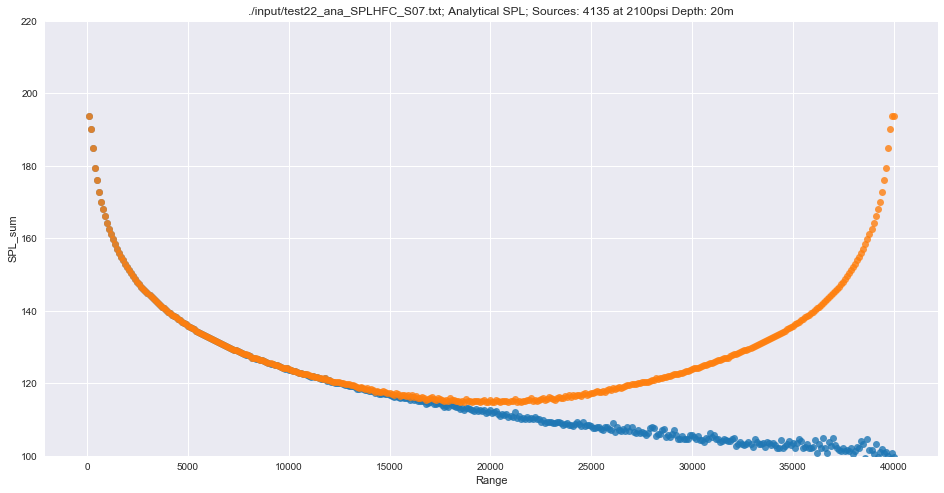

In [55]:
plt.figure(figsize=(16,8))
plt.title(plottitle + ' Depth: 20m')
#plt.axhline(160, color='black')
plt.ylim(minval, maxval)
sns.regplot(x=df_shallow['Range'], y=df_shallow[value1], fit_reg=False)
#sns.regplot(x=df_merged_shallow['Range'], y=df_merged_shallow[value1+'_sum'], fit_reg=False)
sns.regplot(x=df_SI_merged_shallow['Range'], y=df_SI_merged_shallow[value1+'_sum'], fit_reg=False)
#sns.regplot(x=df_CLO_SI_merged_shallow['Range'], y=df_CLO_SI_merged_shallow[value1+'_SI_CLO_sum'], fit_reg=False)
plt.savefig('7.png'); 

In [56]:
df_CLO_SI_merged_middepth = df_CLO_SI_merged.loc[df_CLO_SI_merged['Depth'] == 1000].reset_index(drop=True)
df_SI_merged_middepth = df_SI_merged.loc[df_SI_merged['Depth'] == 1000].reset_index(drop=True)
df_merged_middepth = df_merged.loc[df_merged['Depth'] == 1000].reset_index(drop=True)
df_middepth = df.loc[df['Depth'] == 1000].reset_index(drop=True)

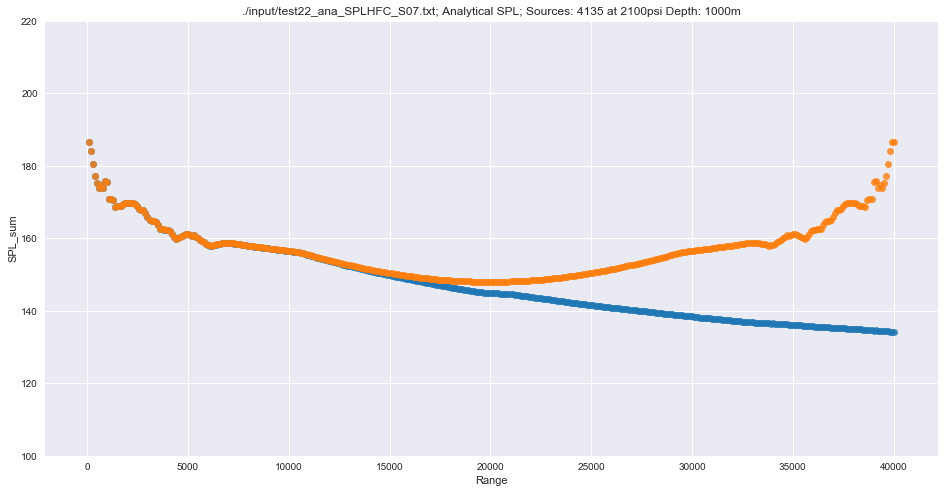

In [57]:
plt.figure(figsize=(16,8))
plt.title(plottitle + ' Depth: 1000m')
#plt.axhline(160, color='black')
plt.ylim(minval, maxval)
sns.regplot(x=df_middepth['Range'], y=df_middepth[value1], fit_reg=False)
#sns.regplot(x=df_merged_middepth['Range'], y=df_merged_middepth[value1+'_sum'], fit_reg=False)
sns.regplot(x=df_SI_merged_middepth['Range'], y=df_SI_merged_middepth[value1+'_sum'], fit_reg=False)
#sns.regplot(x=df_CLO_SI_merged_middepth['Range'], y=df_CLO_SI_merged_middepth[value1+'_SI_CLO_sum'], fit_reg=False)
plt.savefig('8.png'); 

In [58]:
df_CLO_SI_merged_deepdepth = df_CLO_SI_merged.loc[df_CLO_SI_merged['Depth'] == 2000].reset_index(drop=True)
df_SI_merged_deepdepth = df_SI_merged.loc[df_SI_merged['Depth'] == 2000].reset_index(drop=True)
df_merged_deepdepth = df_merged.loc[df_merged['Depth'] == 2000].reset_index(drop=True)
df_deepdepth = df.loc[df['Depth'] == 2000].reset_index(drop=True)

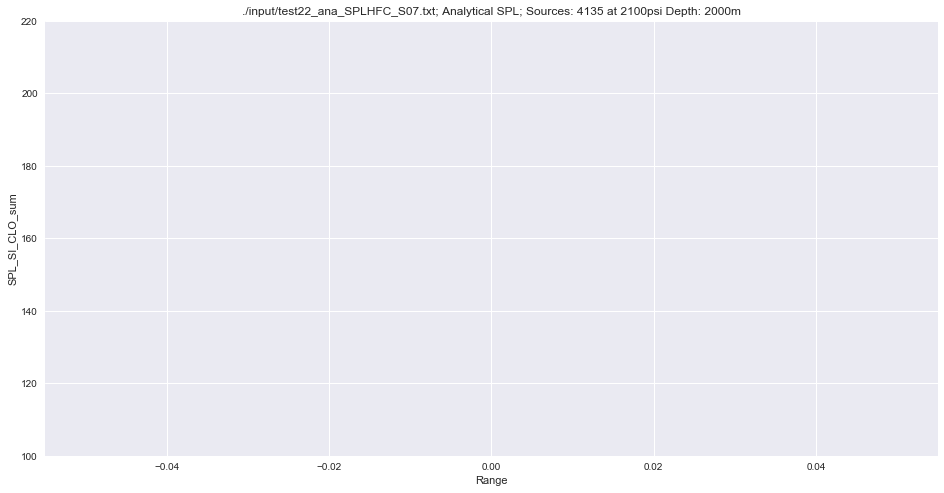

In [59]:
plt.figure(figsize=(16,8))
plt.title(plottitle + ' Depth: 2000m')
#plt.axhline(160, color='black')
plt.ylim(minval, maxval)
sns.regplot(x=df_deepdepth['Range'], y=df_deepdepth[value1], fit_reg=False)
sns.regplot(x=df_merged_deepdepth['Range'], y=df_merged_deepdepth[value1+'_sum'], fit_reg=False)
sns.regplot(x=df_SI_merged_deepdepth['Range'], y=df_SI_merged_deepdepth[value1+'_sum'], fit_reg=False)
sns.regplot(x=df_CLO_SI_merged_deepdepth['Range'], y=df_CLO_SI_merged_deepdepth[value1+'_SI_CLO_sum'], fit_reg=False)
plt.savefig('9.png'); 